![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning. 

### Linear Regression

In [13]:
import pandas as pd
df = pd.read_csv('https://github.com/anvarnarz/praktikum_datasets/blob/main/housing_LR.csv?raw=true', index_col=0)

df.head(10)

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0
7,Яккасарайский,2,32.0,5,5,20000.0
8,Учтепинский,2,51.0,3,4,26200.0
9,Чиланзарский,1,30.0,1,4,22200.0


# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy

In [14]:
df['district'].value_counts()

Чиланзарский         1616
Мирзо-Улугбекский    1342
Учтепинский           872
Юнусабадский          847
Мирабадский           717
Яккасарайский         628
Яшнободский           456
Шайхантахурский       356
Олмазорский           262
Сергелийский          159
Янгихаётский           15
Бектемирский            8
Name: district, dtype: int64

**Darsimiz uchun Chilonzor tumanidagi uylarning narxini bashorat qilib ko'ramiz**

In [15]:
housing = df[df.district=='Чиланзарский']
housing.head()

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0


In [16]:
X = housing['size']
X

2       42.0
3       65.0
4       70.0
5       28.0
6       30.0
        ... 
7404    70.0
7422    20.0
7433    32.0
7445    70.0
7464    30.0
Name: size, Length: 1616, dtype: float64

In [17]:
y = housing['price']
y

2       37000.0
3       49500.0
4       55000.0
5       25500.0
6       21200.0
         ...   
7404    48000.0
7422    18500.0
7433    28000.0
7445    49800.0
7464    22914.0
Name: price, Length: 1616, dtype: float64

**Narx va uy maydoni o'rtasida chiziqli bog'liqlik bor ekanini tekshirib ko'ramiz.**

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

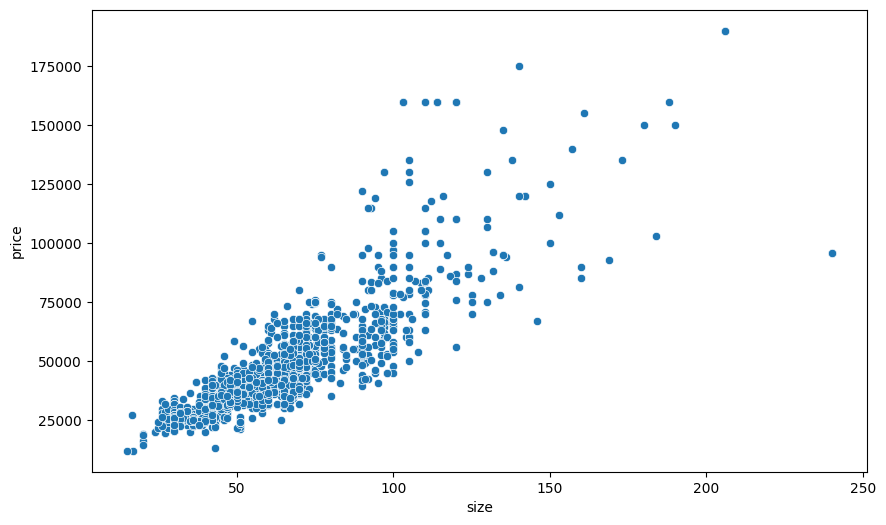

In [19]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=housing, x='size', y='price')

plt.show()

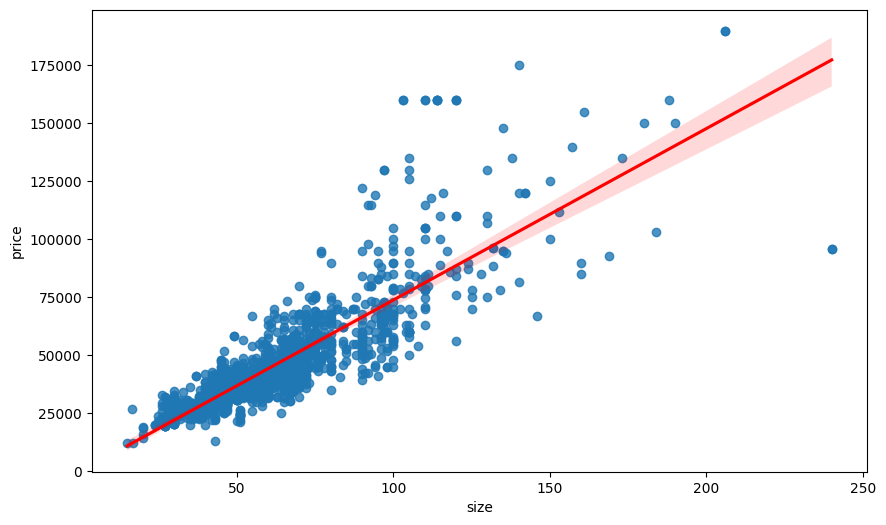

In [20]:
plt.figure(figsize=(10,6))

sns.regplot(data=housing, x='size', y='price', line_kws={"color": "red"})

plt.show()

## 1-Vazifa
Sizning vazifangiz yuqoridagi `X` va `y` o'zgaruvchilardan quyidagi formuladan foydalangan xolda $\theta_0$ va $\theta_1$ koeffisientlarni hisoblash.

![Imgur](https://i.imgur.com/zZoXZxI.png)

Bu yerda $\tilde{x}$ - `X` ustun uchun o'rtracha qiymat,  $\tilde{y}$ - `y` ustun uchun o'rtracha qiymat

In [34]:
temp = pd.DataFrame({'x': X, 'y': y})

temp['x_without_mean'] = temp['x'] - X.mean()
temp['y_without_mean'] = temp['y'] - y.mean()

temp['x*y'] = temp['x_without_mean'] * temp['y_without_mean']

temp['x_without_mean_square'] = temp['x_without_mean'] ** 2

o1 = temp['x*y'].sum() / temp['x_without_mean_square'].sum()
o1

740.0264822713249

In [35]:
o0 = y.mean() - o1 * X.mean()
o0

-195.94911352666531

## 2-Vazifa
`X` dan bir nechta tasodifiy qiymatlarni ajratib oling va ularga mos keluvchi `y` ni yuqoridagi koeffisientlar yordamida hisoblab ko'ring.

![Imgur](https://i.imgur.com/iT5tffj.png)

In [38]:
X_test = X.sample(10)

X_test

6366     72.0
5497     72.0
1815     51.0
888      72.0
5296     67.0
6292    128.0
5155     92.0
2927     45.0
989      48.0
2586     58.0
Name: size, dtype: float64

In [43]:
y_test = y.loc[X_test.index]
y_test

6366    55500.0
5497    51500.0
1815    32500.0
888     44500.0
5296    46000.0
6292    85000.0
5155    56000.0
2927    37000.0
989     42200.0
2586    47000.0
Name: price, dtype: float64

In [40]:
labels = o0 + o1 * X_test

labels

6366    53085.957610
5497    53085.957610
1815    37545.401482
888     53085.957610
5296    49385.825199
6292    94527.440617
5155    67886.487255
2927    33105.242589
989     35325.322035
2586    42725.586858
Name: size, dtype: float64

## 3-Vazifa

Hisoblangan va asl qiymtlar o'rtasidagi RMSE (root mean square error), MAE (mean absolute error) hisoblang.

![Imgur](https://i.imgur.com/GJH9CGy.png)

![Imgur](https://i.imgur.com/aXL9iWa.png)

In [42]:
import numpy as np

In [56]:
metric = pd.DataFrame({'true': y_test, 'predicted': labels})

metric

,true,predicted
6366,55500.0,53085.957610
5497,51500.0,53085.957610
1815,32500.0,37545.401482
888,44500.0,53085.957610
5296,46000.0,49385.825199
6292,85000.0,94527.440617
5155,56000.0,67886.487255
2927,37000.0,33105.242589
989,42200.0,35325.322035
2586,47000.0,42725.586858


In [58]:
metric['h(x^i)-y^i'] = metric['true'] - metric['predicted']

mae = np.abs(metric['h(x^i)-y^i']).sum() / metric['h(x^i)-y^i'].count()

mae

5747.496068121984

In [62]:
rmse = metric['h(x^i)-y^i'] ** 2

rmse = rmse.sum() / rmse.count()
rmse = np.sqrt(rmse)
rmse

6570.71581168376